<font size="5"><b>Partial Exam 2</b></font>

**Compile your answers inside this notebook (Spanish or English). Your answers can be written either in markdown cells (M) or Python cells (Y).**<br>
<br>
**You have 1.5 hours. At the end of this time, send your notebook file .ipynb to valade@igeofisica.unam.mx**<br>
<br>
<u>Note</u>: if you encounter difficulties to implement your answers, you can write "pseudo-code" (explain the steps your algorithm would need to solve the problem).<br>
<br>
<u>Reminder</u>: your final grade will be the average of the 3 partial exams you will give throughout this course.<br>
<br>
Don't stress, this exam is not meant to trick you, but rather to test your knowledge up until now!

# Theory (2.5 pts)

<div class="alert alert-success">
    <b>1.</b> How would you define Machine Learning?
</div>

<div class="alert alert-success">
    <b>2.</b> What are the two most common supervised tasks? What is the main difference between them?
</div>

<div class="alert alert-success">
    <b>3.</b> What is a labeled training dataset, and what is a test dataset? Why is it important to seperate your data?
</div>

<div class="alert alert-success">
    <b>4.</b> If your model performs well on the training data but does not generalize well on the test data, what is happening?
</div>

<div class="alert alert-success">
    <b>5.</b> Summarize in your own words what PCA is, and what it can be used for.
</div>

<div class="alert alert-success">
    <b>6.</b> What is the fundamental idea behind Support Vector Machines?
</div>

# Practice (7.5 pts)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## load the dataset

<div class="alert alert-warning">
    The file "geysers.xlsx" stores 150 eruptions from 3 distinct geysers. The columns store for each eruption the following measurements:<br>
    <ul>
        <li>eruption duration</li>
        <li>acoustic pressure</li>
        <li>eruption height</li>
        <li>inter-eruptive duration</li>
        <li>geyser id</li>
    </ul>
</div>

<div class="alert alert-success">
    Open the file "geysers.xlsx" using the pandas library, using the code below.<br>
    <br>
    The variable "df" is a pandas dataframe (you can access the data just like any Python dictionary, where column names would correspond to dictionary keys). You can ignore it if you are not comfortable with it, and use the numpy arrays "X" and "Y" instead.<br>
    <br>
    The numpy array "X" stores the measurements of the 150 eruptions, with columns 1 to 4 corresponding respectively to: "eruption duration", "acoustic pressure", "eruption height", "inter-eruptive duration".<br>
    The numpy array "Y" stores to the "geyser identification number" (i.e., target variable).
</div>

In [2]:
# Open the xlsx file as a pandas dataframe
import pandas as pd
df = pd.read_excel('geysers.xlsx')

# Store in numpy arrays
dataset = np.array(df)
X = dataset[:, :-1]
Y = dataset[:, -1:]

In [6]:
# Visualize the top-most part of the dataframe
df.head()

eruption duration  acoustic pressure  eruption height  \
0                5.1                3.5              1.4   
1                4.9                3.0              1.4   
2                4.7                3.2              1.3   
3                4.6                3.1              1.5   
4                5.0                3.6              1.4   

   inter-eruptive duration  geyser id  
0                      0.2          0  
1                      0.2          0  
2                      0.2          0  
3                      0.2          0  
4                      0.2          0

## plot the dataset

<div class="alert alert-success">
    Make a plot of the the "inter-eruptive duration" (x-axis) against the "eruption height" (on the y-axis).<br>
    <br>
    <u>Note</u>: you can get the data by slicing the numpy array "X", or by accessing the corresponding columns of the dataframe "df" (use the columns names).
</div>

## apply a linear regression model

<div class="alert alert-success">
    Use scikit-learn to build a linear regression model on the data plotted above.<br>
    <br>
    <u>Note</u>: the shape of the arrays you parse to the scikit-learn's function should be 2D, i.e. (150,1) not (150,). One option to add a dimension is the following code: x = np.expand_dims(x, axis=1)
</div>

## plot and predict from the model

<div class="alert alert-success">
    Plot a scatter plot of the data, and add the linear model as a red line.<br>
    <br>
    What would be the eruption height predicted by the model for an inter-eruption duration of 0.75 hour? Plot the predicted point on the figure.
</div>

## compute and plot the eigenvectors

<div class="alert alert-success">
    1. Calculate the "mean-free" eruption height and inter-eruptive duration (i.e, compute the mean of the eruption height, and substract it to all eruption height values; same for the inter-eruptive duration).<br>
    <br>
    2. Calculate the covariance matrix of the "mean-free" variables using numpy. (This time, make sure the arrays parsed to the function are 1D, i.e. (150,))<br>
    <br>
    3. Calculate the eigen vectors and eigen values of the covariance matrix using numpy.<br>
    <br>
    4. Sort the eigenvectors according to the eigenvalues. Knowing that the eigenvectors are stored as columns, and that the 1st line is the value of dx, the second line the value of dy, plot the eigenvectors on top of the scatter plot of the mean-free variables using <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html" target="_blank">matplotlib.arrow</a> and the following code:<br>
    Note: you can set the scale of the vectors to 1, or use the eigenvalues as a scale factor.
</div>

```python
# plot eigenvector as arrow
plt.arrow(0, 0, dx*scale, dy*scale, color=cols[i], width=.1, zorder=100)
```

## PCA applied on entire dataset

<div class="alert alert-success">
    The code below uses scikit-learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html" target="_blank">PCA</a> function to find the first 3 principal components of the dataset, and project the data onto these.<br>
    <br>
    Comment the figure generated below: what is being plotted? why is PCA analysis useful in this case? 
</div>

In [35]:
# Compute PCA with 3 components
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(X)

# Project the dataset on the principal components
X_pca = pca.transform(X)

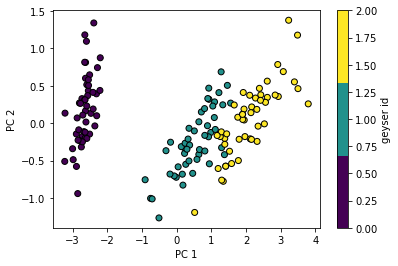

In [33]:
# Plot on 2 PCs
from matplotlib import cm

h = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=cm.get_cmap('viridis', 3), edgecolor='k')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(h, label='geyser id')